# Host-Only LAISS, Dust-Corrected

In [1]:
import os

# a silly hack to switch the working directory to the one where this file is located
working_dir = os.path.abspath("")

import time
import datetime
import math
import numpy as np
import pandas as pd
import sys
import astro_ghost
import os
import subprocess
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.spatial.distance import euclidean
from dust_extinction.parameter_averages import G23
import astropy.units as u
from sfdmap2 import sfdmap
import corner
import matplotlib.pyplot as plt
import logging
from tqdm import tqdm

os.chdir(working_dir)
sys.path.append('../code/')

from helper_functions import *
from laiss_functions import *
from mod_helper_functions import *
from mod_laiss_functions import *

import requests
from requests.auth import HTTPBasicAuth

import warnings
warnings.filterwarnings("ignore")

### Create host-only dataset bank by modifying raw dataset bank

In [ ]:
# raw_dataset_bank = pd.read_csv("../data/ZTFBTS_noCuts_hostdata.csv").rename(columns={'ZTFID': 'ztf_object_id'}) # Old bank: "../data/GHOST_withZTFNames.csv"
# print("Shape of raw dataset bank:", raw_dataset_bank.shape)

# raw_host_features = ['ztf_object_id']
# for band in ['g', 'r', 'i', 'z']:
#     for feat in ['momentXX', 'momentYY', 'momentXY', 'KronMag', 'KronMagErr', 'KronRad', 'ExtNSigma']:
#         raw_host_features.append(band+feat)
# raw_host_features += ['A_V']

# wip_dataset_bank = filtered_raw_dataset_bank.replace([np.inf, -np.inf, -999], np.nan).dropna()
# print("Shape of WIP dataset bank:", wip_dataset_bank.shape)

# # Create ell features
# for band in ['g', 'r', 'i', 'z']:
#     xx = wip_dataset_bank[band+'momentXX']
#     yy = wip_dataset_bank[band+'momentYY']
#     xy = wip_dataset_bank[band+'momentXY']
#     wip_dataset_bank[band+'ell'] = np.sqrt(
#         (xx - yy)/(xx+yy)**2 + (2*xy)*2/(xx+yy)
#         )

# central_wv_filters = {
#      'g': 4849.11,
#      'r': 6201.20,
#      'i': 7534.96,
#      'z': 8674.20
# }

# def getExtinctionCorrectedMag(transient_row, band, mw_av):
#     MW_RV = 3.1
#     ext = G23(Rv=MW_RV)

#     # m = sfdmap.SFDMap('../data/sfddata-master')
#     # MW_EBV = m.ebv(float(transient_row['ra_deg']), float(transient_row['dec_deg']))

#     MW_AV = mw_av # MW_RV*MW_EBV
#     wv_filter = central_wv_filters[band]
#     A_filter = -2.5*np.log10(ext.extinguish(wv_filter*u.AA, Av=MW_AV))

#     return transient_row[band+'KronMag'] - A_filter

# tqdm.pandas()
# for band in ['g', 'r', 'i', 'z']:
#     wip_dataset_bank[band+'KronMagCorrected'] = wip_dataset_bank.progress_apply(
#         lambda row: getExtinctionCorrectedMag(row, band, row['A_V']), axis=1
#     )

# # Create mag difference features
# wip_dataset_bank['gminusrKronMag'] = wip_dataset_bank['gKronMag'] - wip_dataset_bank['rKronMag']
# wip_dataset_bank['rminusiKronMag'] = wip_dataset_bank['rKronMag'] - wip_dataset_bank['iKronMag']
# wip_dataset_bank['iminuszKronMag'] = wip_dataset_bank['iKronMag'] - wip_dataset_bank['zKronMag']

# # Calculate color uncertainties
# wip_dataset_bank['gminusrKronMagErr'] = np.sqrt(wip_dataset_bank['gKronMagErr']**2 + wip_dataset_bank['rKronMagErr']**2)
# wip_dataset_bank['rminusiKronMagErr'] = np.sqrt(wip_dataset_bank['rKronMagErr']**2 + wip_dataset_bank['iKronMagErr']**2)
# wip_dataset_bank['iminuszKronMagErr'] = np.sqrt(wip_dataset_bank['iKronMagErr']**2 + wip_dataset_bank['zKronMagErr']**2)

# # Mag difference features down-weighting outliers
# epsilon = 0.01
# for feat in ['gminusrKronMag', 'rminusiKronMag', 'iminuszKronMag']:
#     median = wip_dataset_bank[feat].median()
#     wip_dataset_bank[feat+'_mod'] = np.sqrt((wip_dataset_bank[feat]**2) / ((wip_dataset_bank[feat] - median)**2 + epsilon))


# final_dataset_bank = wip_dataset_bank

# # Write dataset bank to .csv
# print("Shape of final dataset bank:", final_dataset_bank.shape)
# final_dataset_bank.to_csv('../data/final_dataset_bank_host_only_laiss.csv', index=False)
# print("Successfully saved dataset bank!")

Shape of raw dataset bank: (9625, 383)
Shape of WIP dataset bank: (8830, 30)


100%|██████████| 8830/8830 [00:29<00:00, 301.60it/s]


Shape of final dataset bank: (8830, 47)
Successfully saved dataset bank!


### Find interesting hosts on which to run ANNOY

In [ ]:
# bank_df = pd.read_csv('../data/final_dataset_bank_host_only_laiss.csv')
# unique_hosts_ztf_ids = bank_df[bank_df['rminusiKronMag'] >= 3].iloc[:, :1].values[0][0]
# print(unique_hosts_ztf_ids)

### Run Host-Only LAISS

Building new ANNOY index with 8830 transients...
Done!
ZTF21abfjrjy is in dataset_bank. Continuing...
Created output dictionary!
Loading previously saved ANNOY index without PCA:
../data/host_only_laiss_annoy_index_pcaFalse.ann


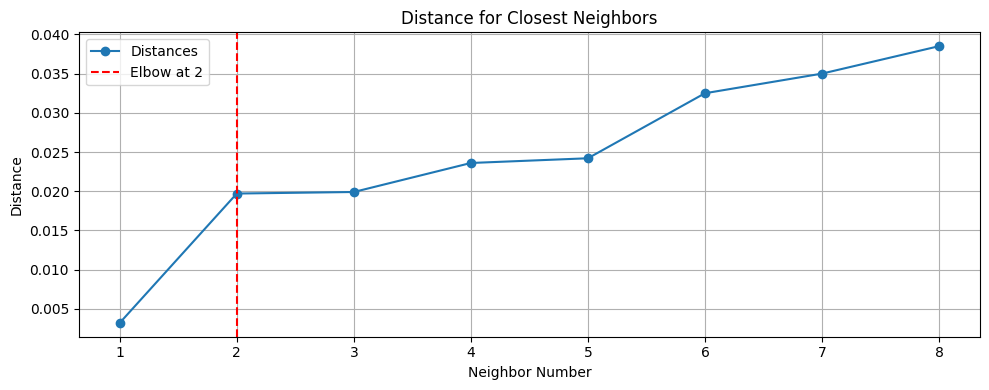

Suggested number of neighbors: 2. Suggested Maximum Distance: 0.02
Number of neighbors found: 8
					   ZTFID IAU_NAME SPEC Z
HOST REF: https://alerce.online/object/ZTF21abfjrjy 2021pka SN Ia 0.074052
ANN=1: https://alerce.online/object/ZTF21aafkwtk 2021apg SN II, 0.026898
ANN=2: https://alerce.online/object/ZTF19aavqics 2019gxo SN II, 0.0215
ANN=3: https://alerce.online/object/ZTF20aaurexl 2020hes SN Ic-BL, 0.07
ANN=4: https://alerce.online/object/ZTF21abdlvxh 2021oez SN Ia, 0.039074
ANN=5: https://alerce.online/object/ZTF23aaixylr 2023hvj SN Ia, 0.066
ANN=6: https://alerce.online/object/ZTF19aakrawk 2019bvn SN Ia, 0.063
ANN=7: https://alerce.online/object/ZTF24abcgrbl 2024snj SN Ia, 0.08
ANN=8: https://alerce.online/object/ZTF18acpfwmm 2018iui SN Ia, 0.0493

ANN elapsed_time = 0.166 s

total elapsed_time = 10.121 s



In [ ]:
queried_ztf_id = 'ZTF21abfjrjy' # Any ztf_id in dataset bank
use_pca = False
num_pca_components = 10 # Only matters if use_pca = True
host_only_laiss_features = ['gKronMagCorrected', 
                            'gKronRad', 
                            'gExtNSigma', 
                            'gell',
                            'rKronMagCorrected',
                            'rKronRad', 
                            'rExtNSigma', 
                            'rell',
                            'iKronMagCorrected', 
                            'iKronRad', 
                            'iExtNSigma',
                            'iell',
                            'zKronMagCorrected', 
                            'zKronRad', 
                            'zExtNSigma',
                            'zell',
                            'gminusrKronMag', 
                            'rminusiKronMag', 
                            'iminuszKronMag'
                            ]

binary_index_path = "../data/"+host_only_build_indexed_sample(
                                fn='../data/final_dataset_bank_host_only_laiss.csv',
                                host_features=host_only_laiss_features,
                                pca=use_pca,
                                n_components= num_pca_components,
                                save=True,
                                force_recreation_of_index=True
                                )

# Set up file structure for the GHOST code that associates transients with their host galaxies.
host_path = "../data/host_info"
if not os.path.exists(host_path):
    os.makedirs(host_path)
os.environ['GHOST_PATH'] = host_path


# Get primer dictionary. Note that only transients in the dataset bank can be passed into this function right now because
# ... for transients not in the dataset it uses extract_lc_and_host_features() which extracts the original LAISS features,
# ... not the new, host-only ones.
laiss_dict = host_only_LAISS_primer(
    ztf_id = queried_ztf_id,
    dataset_bank_path='../data/final_dataset_bank_host_only_laiss.csv',
    host_features = host_only_laiss_features
)

host_neighbors = host_only_LAISS_nearest_neighbors(
    laiss_dict=laiss_dict,
    use_pca_for_nn=use_pca,
    n_components=num_pca_components,
    annoy_index_file_path=binary_index_path,
    n=9,
    max_neighbor_dist=100,
    search_k=5000,
    return_results=True,
)

#### Look at color uncertainty of neighbors

In [18]:
neighbor_ztfids = [link.split("/")[-1] for link in host_neighbors["ztf_link"]]

bank_df = pd.read_csv('../data/final_dataset_bank_host_only_laiss.csv')

neighbors_df = bank_df[bank_df['ztf_object_id'].isin(neighbor_ztfids)]
input_host_df = bank_df[bank_df['ztf_object_id'].isin([queried_ztf_id])]

color_cols = ['gminusrKronMagErr', 'rminusiKronMagErr', 'iminuszKronMagErr']

real_color_cols = ['gminusrKronMag', 'rminusiKronMag', 'iminuszKronMag']
print(input_host_df[real_color_cols])
print(neighbors_df[real_color_cols])

print("Statistics of color uncertainty:")
print(bank_df[color_cols].describe())

print("\nColor uncertainty of input host galaxy:")
print(input_host_df[color_cols])

print("\nColor uncertainty of neighbors:")
print(neighbors_df[color_cols])


     gminusrKronMag  rminusiKronMag  iminuszKronMag
562        0.822399           0.409          0.1675
      gminusrKronMag  rminusiKronMag  iminuszKronMag
308         0.836800          0.4093        0.162500
2954        0.805900          0.4037        0.169300
3162        0.822700          0.4068        0.168200
4745        0.828300          0.3944        0.171200
5494        0.814701          0.4123        0.188999
5703        0.817600          0.4072        0.154202
6519        0.841901          0.3979        0.175400
7350        0.819300          0.4287        0.155300
Statistics of color uncertainty:
       gminusrKronMagErr  rminusiKronMagErr  iminuszKronMagErr
count        8830.000000        8830.000000        8830.000000
mean            0.012995           0.010165           0.013679
std             0.024787           0.018226           0.026300
min             0.000085           0.000046           0.000043
25%             0.002927           0.002013           0.002480
50%     

### Create corner plot from host only neighbor search

Total number of transients for corner plots: 8830
Creating corner plot for g_band...
Total number of transients for corner plot after outlier removal: 4362


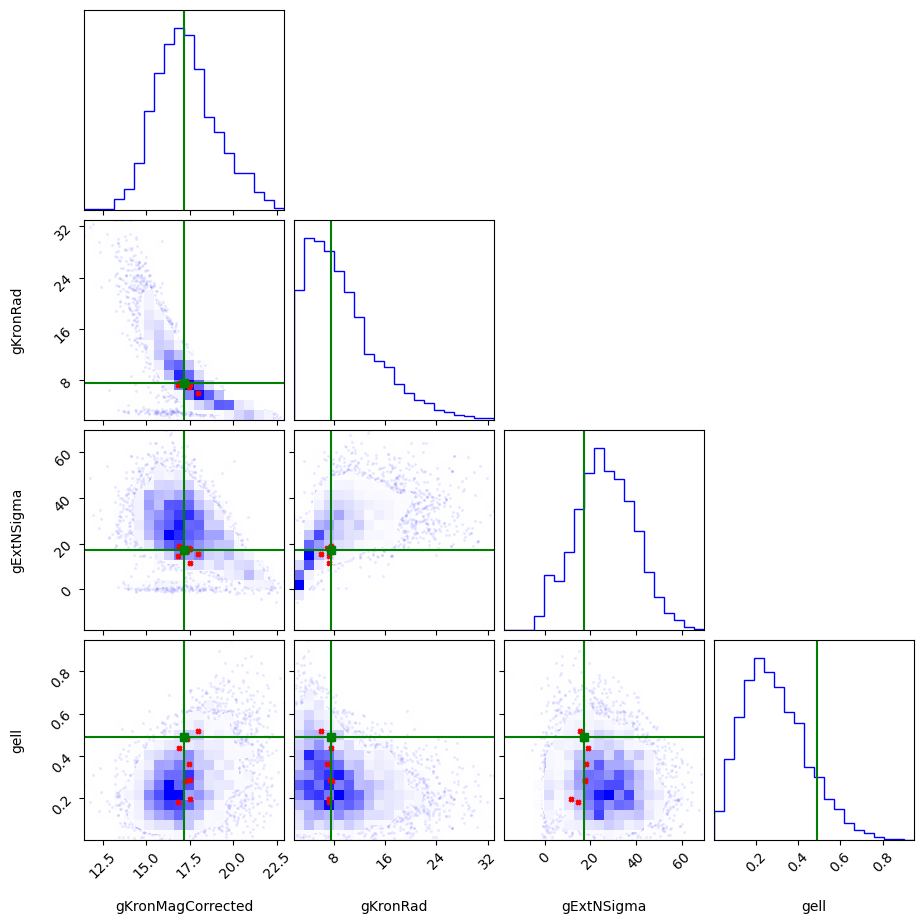

Creating corner plot for r_band...
Total number of transients for corner plot after outlier removal: 4359


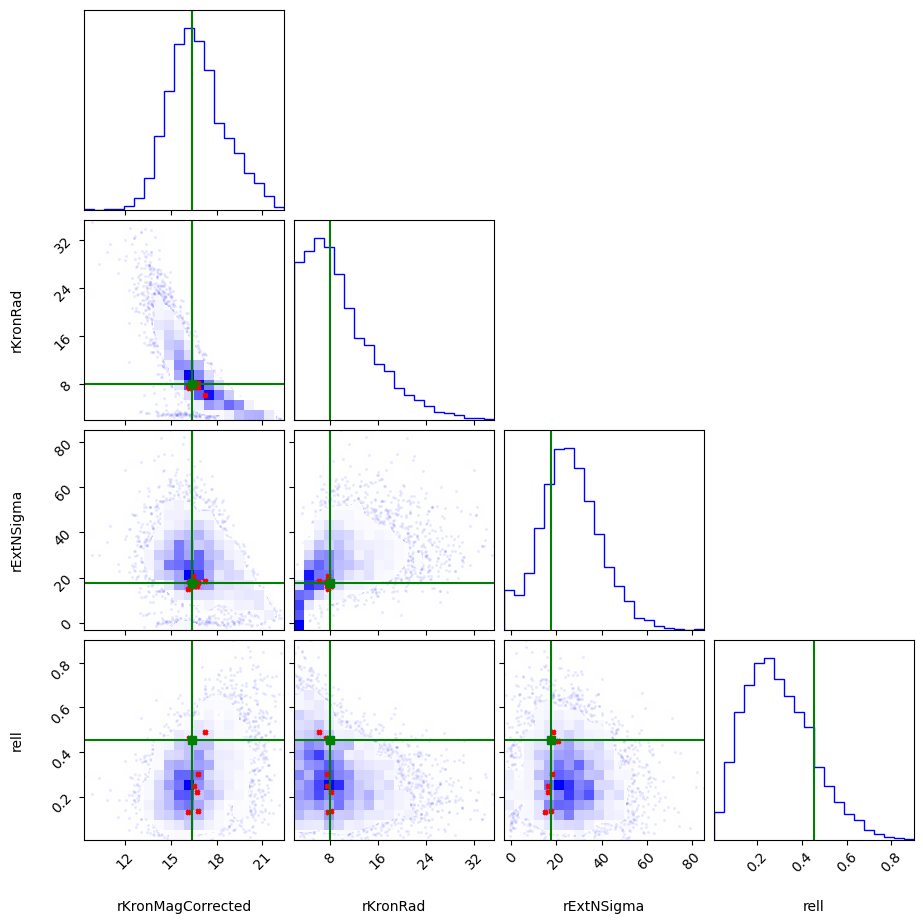

Creating corner plot for i_band...
Total number of transients for corner plot after outlier removal: 4355


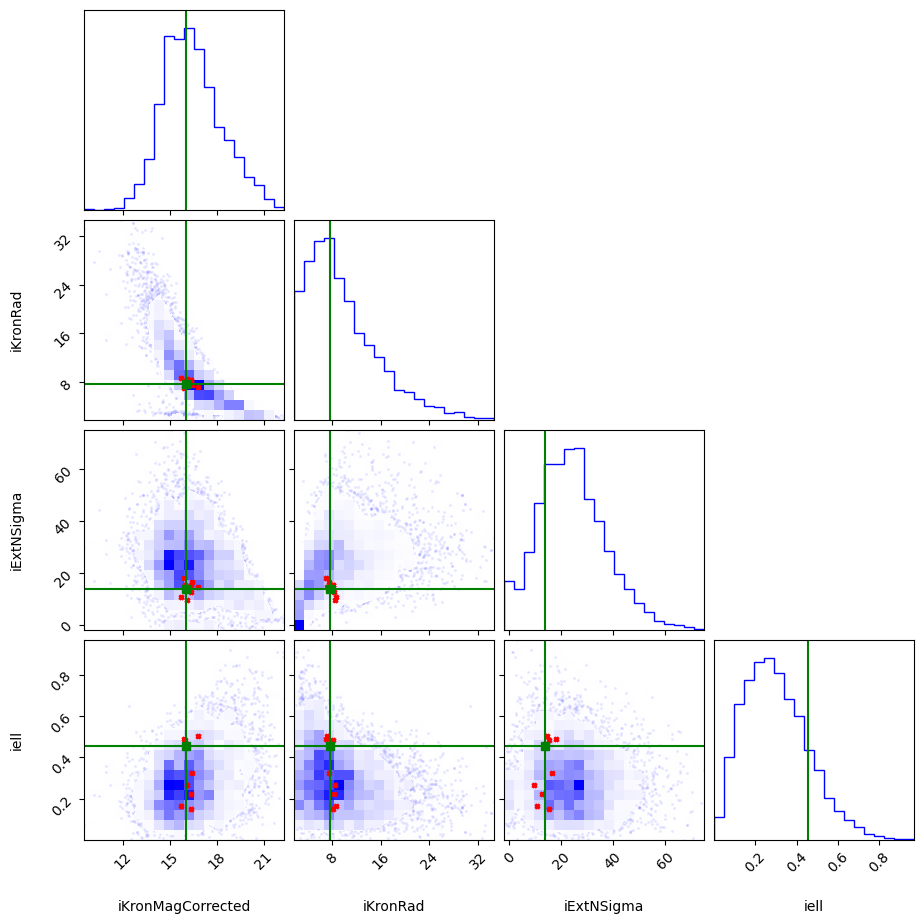

Creating corner plot for z_band...
Total number of transients for corner plot after outlier removal: 4386


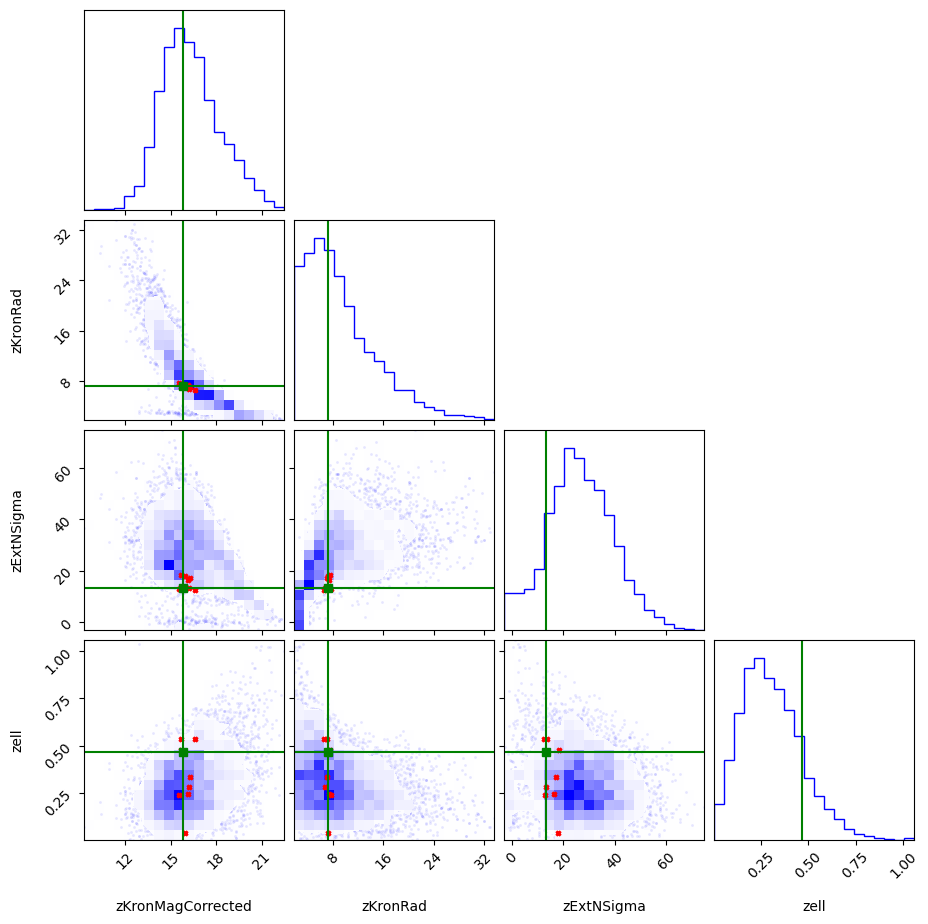

Creating corner plot for band_differences...
Total number of transients for corner plot after outlier removal: 8395


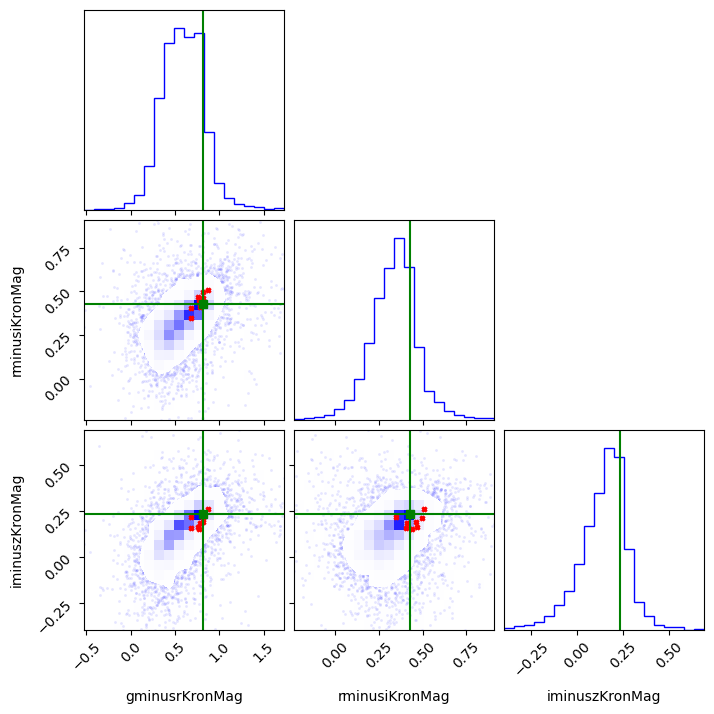

Finished creating all plots!


In [20]:
remove_outliers_bool = True

logging.getLogger().setLevel(logging.ERROR)

host_only_laiss_features_dict = {
    'g_band': ['gKronMagCorrected', 'gKronRad', 'gExtNSigma', 'gell'],
    'r_band': ['rKronMagCorrected', 'rKronRad', 'rExtNSigma', 'rell'],
    'i_band': ['iKronMagCorrected', 'iKronRad', 'iExtNSigma', 'iell'],
    'z_band': ['zKronMagCorrected', 'zKronRad', 'zExtNSigma', 'zell'],
    'band_differences': ['gminusrKronMag', 'rminusiKronMag', 'iminuszKronMag']
}

neighbor_ztfids = [link.split("/")[-1] for link in host_neighbors["ztf_link"]]

dataset_bank_df = pd.read_csv('../data/final_dataset_bank_host_only_laiss.csv')[['ztf_object_id'] + host_only_laiss_features]

print("Total number of transients for corner plots:", dataset_bank_df.shape[0])

for batch_name, features in host_only_laiss_features_dict.items():
    print(f"Creating corner plot for {batch_name}...")

    # REMOVING OUTLIERS #
    def remove_outliers(df, threshold=3):  # Smaller threshold removes more data
        df_clean = df.copy()
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns  # Only numeric columns

        for col in numeric_cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Remove only extreme outliers
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

        return df_clean
    
    dataset_bank_df_batch_features = dataset_bank_df[['ztf_object_id'] + features]

    if remove_outliers_bool:
        dataset_bank_df_batch_features = remove_outliers(dataset_bank_df_batch_features)
        print("Total number of transients for corner plot after outlier removal:", dataset_bank_df_batch_features.shape[0])
    else:
        dataset_bank_df_batch_features = dataset_bank_df_batch_features.replace([np.inf, -np.inf, -999], np.nan).dropna()
        print("Total number of transients for corner plot after NA, inf, and -999 removal:", dataset_bank_df_batch_features.shape[0])
    # REMOVING OUTLIERS #

    neighbor_mask = dataset_bank_df_batch_features['ztf_object_id'].isin(neighbor_ztfids)

    features_df = dataset_bank_df_batch_features[features]

    neighbor_features = features_df[neighbor_mask]
    non_neighbor_features = features_df[~neighbor_mask]
    queried_features = dataset_bank_df_batch_features[dataset_bank_df_batch_features['ztf_object_id'] == queried_ztf_id].iloc[:,1:]
    queried_features_arr = queried_features.values[0]

    figure = corner.corner(non_neighbor_features, color='blue', labels=features, plot_datapoints=True, alpha=0.3, plot_contours=False, truths=queried_features_arr, truth_color='green') # or levels=[0.1, 0.5, 0.9] for contours
    #corner.corner(neighbor_features, color='red', labels=features, plot_datapoints=True, alpha=1.0, markersize=100, marker='x', fig=figure, plot_contours=False) # or levels=[0.1, 0.5, 0.9] for contours
    
    # Overlay neighbor features (red) with larger, visible markers
    axes = np.array(figure.axes).reshape(len(features), len(features))
    for i in range(len(features)):
        for j in range(i):  # Only the lower triangle of the plot
            ax = axes[i, j]
            ax.scatter(
                neighbor_features.iloc[:, j], 
                neighbor_features.iloc[:, i], 
                color='red', 
                s=10,
                marker='x',
                linewidth=2
            )
    plt.show()

print("Finished creating all plots!")


## Corner plots of neighbors with different feature sets

Building new ANNOY index with 8830 transients...
Done!
ZTF18aaqpowv is in dataset_bank. Continuing...
Created output dictionary!
Loading previously saved ANNOY index without PCA:
../data/host_only_laiss_annoy_index_pcaFalse.ann


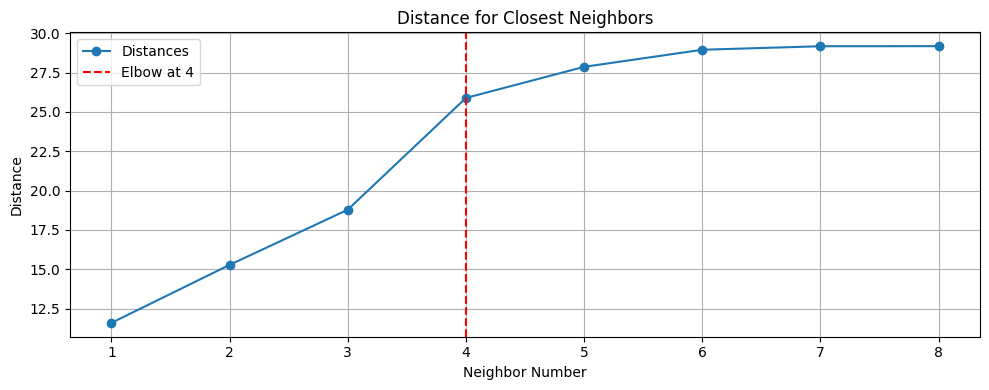

Suggested number of neighbors: 4. Suggested Maximum Distance: 25.89
Number of neighbors found: 8
					   ZTFID IAU_NAME SPEC Z
HOST REF: https://alerce.online/object/ZTF18aaqpowv 2024iwm SN II 0.0324
ANN=1: https://alerce.online/object/ZTF22aaqfuhm 2022nxd SN Ia, 0.036
ANN=2: https://alerce.online/object/ZTF20abwrcmq 2020sck SN Iax[02cx-like], 0.017
ANN=3: https://alerce.online/object/ZTF18acwwonp 2018khw SN Ia, 0.03128
ANN=4: https://alerce.online/object/ZTF24aakxwww 2024hhr SN Ia, 0.05
ANN=5: https://alerce.online/object/ZTF19aaoyech 2019cya SN Ia, 0.06
ANN=6: https://alerce.online/object/ZTF18acrflch 2018jgy SN II, 0.0286
ANN=7: https://alerce.online/object/ZTF19aanhlzi 2019cee SN Ia, 0.0544
ANN=8: https://alerce.online/object/ZTF18abmjvpb 2018fli SN Ia, 0.066077

ANN elapsed_time = 0.008 s

total elapsed_time = 9.662 s

Building new ANNOY index with 8830 transients...
Done!
ZTF18aaqpowv is in dataset_bank. Continuing...
Created output dictionary!
Loading previously saved ANNOY inde

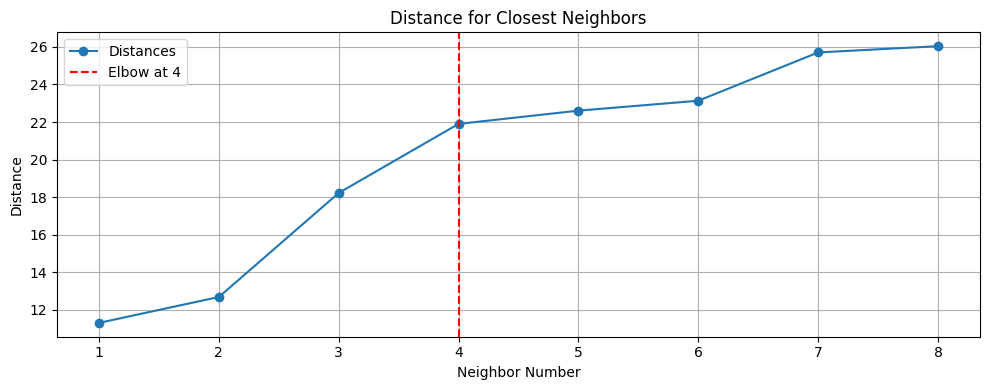

Suggested number of neighbors: 4. Suggested Maximum Distance: 21.9
Number of neighbors found: 8
					   ZTFID IAU_NAME SPEC Z
HOST REF: https://alerce.online/object/ZTF18aaqpowv 2024iwm SN II 0.0324
ANN=1: https://alerce.online/object/ZTF22aaqfuhm 2022nxd SN Ia, 0.036
ANN=2: https://alerce.online/object/ZTF20abwrcmq 2020sck SN Iax[02cx-like], 0.017
ANN=3: https://alerce.online/object/ZTF18acwwonp 2018khw SN Ia, 0.03128
ANN=4: https://alerce.online/object/ZTF24aakxwww 2024hhr SN Ia, 0.05
ANN=5: https://alerce.online/object/ZTF18abmjvpb 2018fli SN Ia, 0.066077
ANN=6: https://alerce.online/object/ZTF19aavoiyc 2019gjq SN Ia, 0.047
ANN=7: https://alerce.online/object/ZTF18acrflch 2018jgy SN II, 0.0286
ANN=8: https://alerce.online/object/ZTF19aanhlzi 2019cee SN Ia, 0.0544

ANN elapsed_time = 0.009 s

total elapsed_time = 4.999 s

Total number of transients for corner plots: 8830
Creating corner plot for g_band...
True neighbors in red, comparison neighbors in purple.
Total number of transien

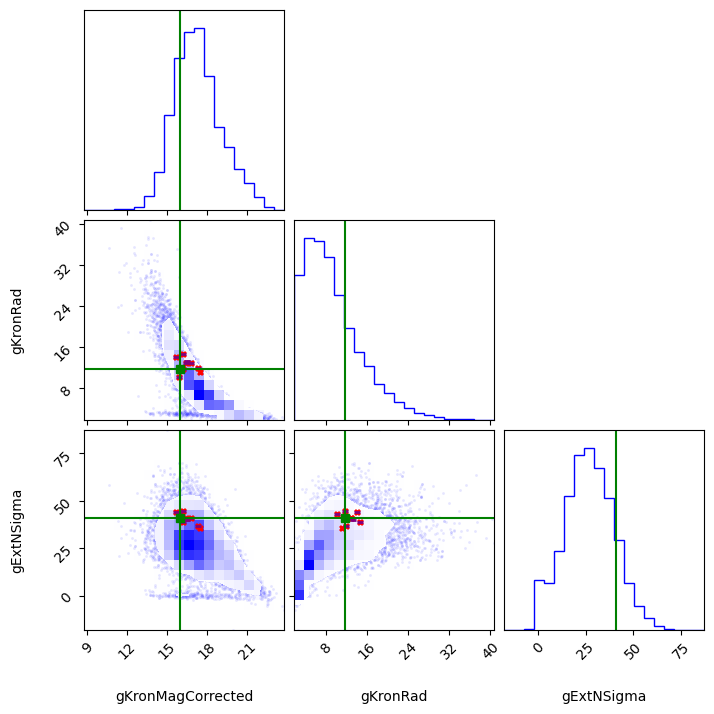

Creating corner plot for r_band...
True neighbors in red, comparison neighbors in purple.
Total number of transients for corner plot after outlier removal: 8826


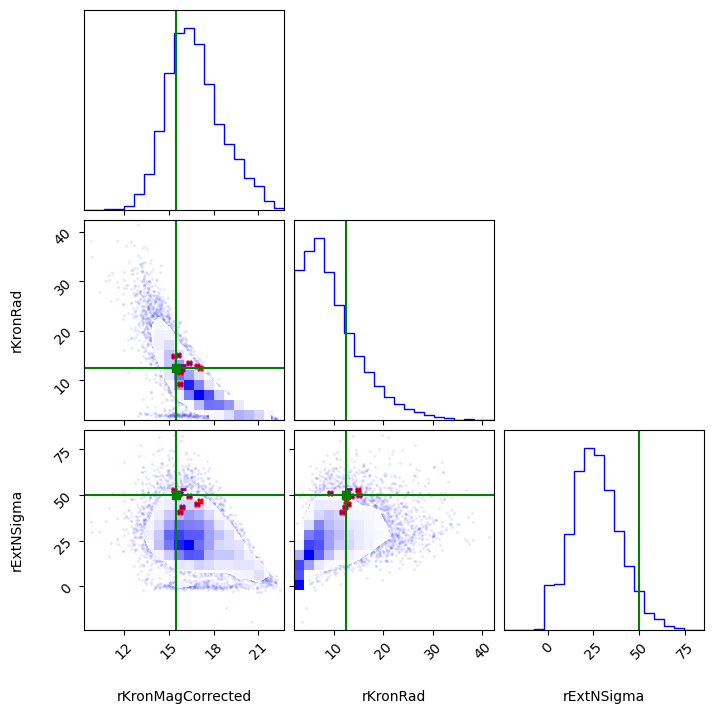

Creating corner plot for i_band...
True neighbors in red, comparison neighbors in purple.
Total number of transients for corner plot after outlier removal: 8829


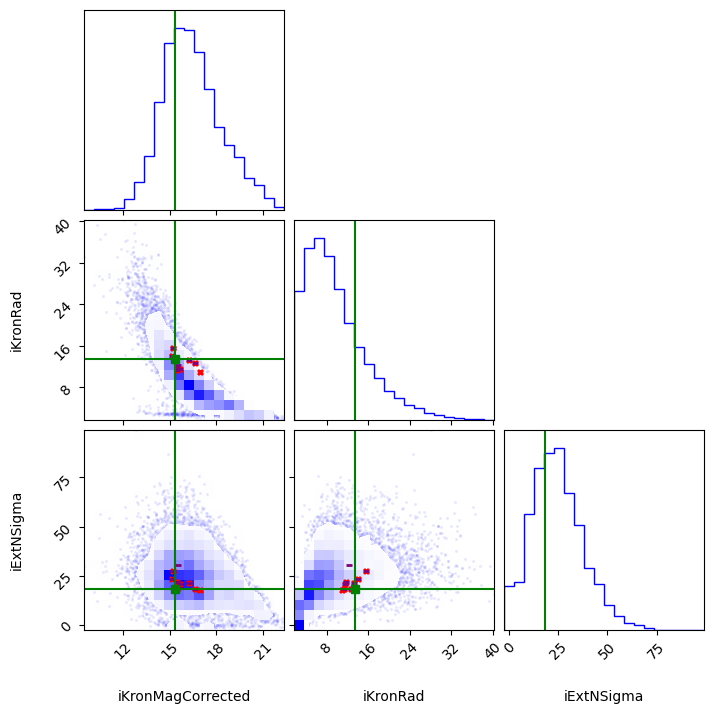

Creating corner plot for z_band...
True neighbors in red, comparison neighbors in purple.
Total number of transients for corner plot after outlier removal: 8828


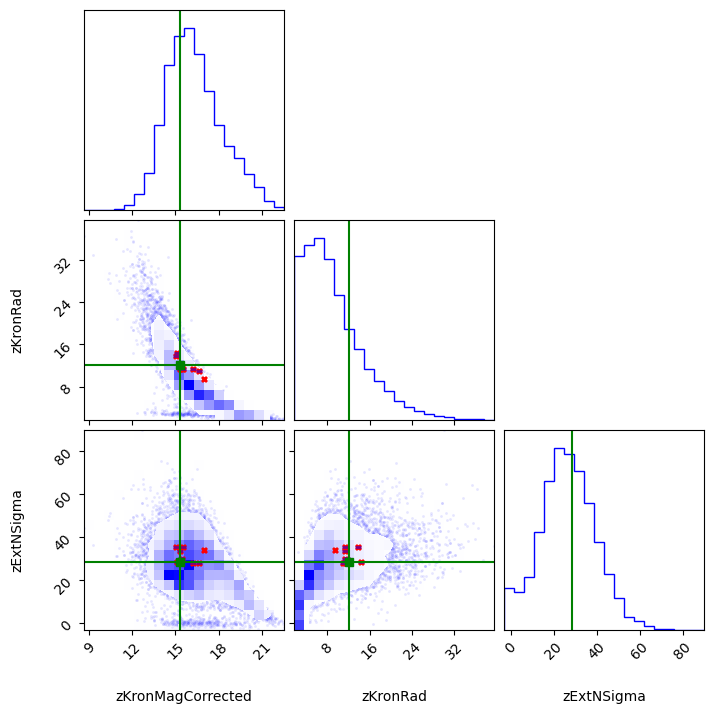

Creating corner plot for band_differences...
True neighbors in red, comparison neighbors in purple.
Total number of transients for corner plot after outlier removal: 8626


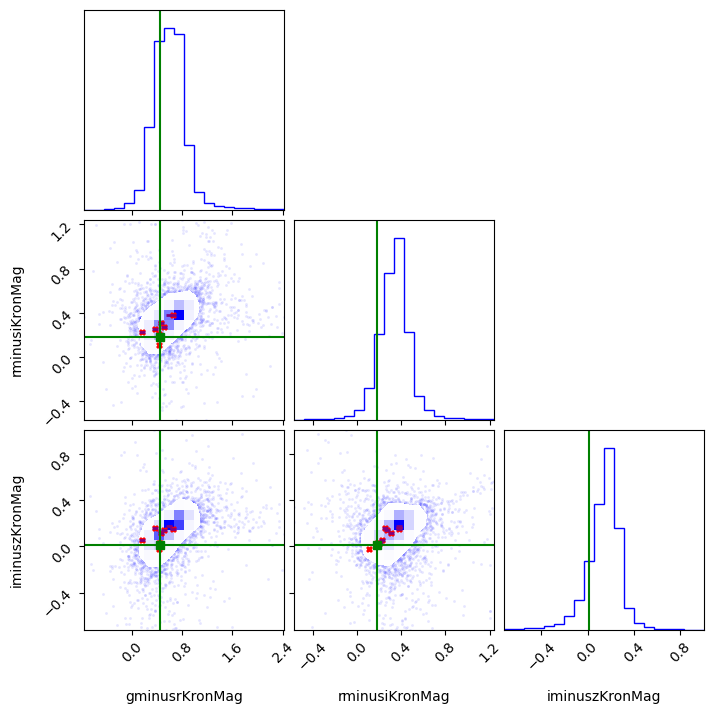

Creating corner plot for mod_band_differences...
True neighbors in red, comparison neighbors in purple.
Total number of transients for corner plot after outlier removal: 8830


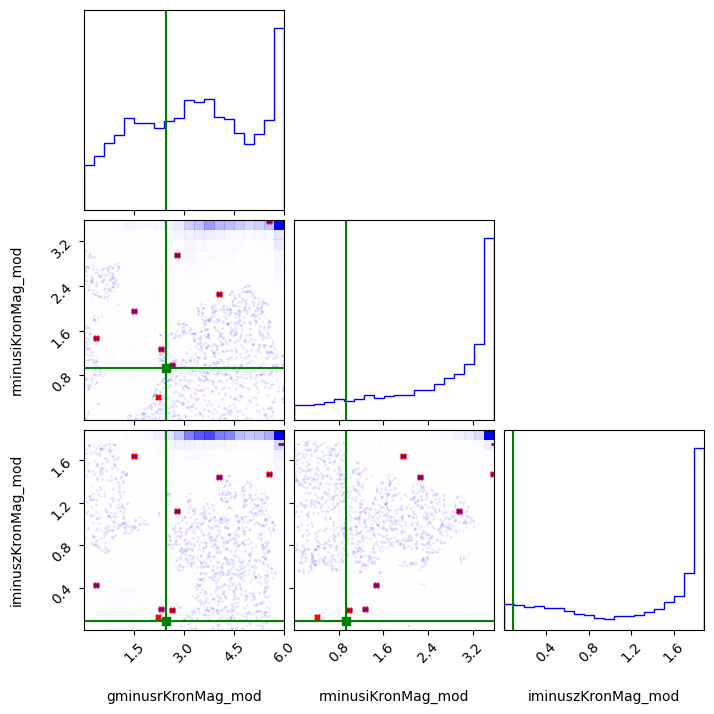

Finished creating all plots!


In [ ]:
queried_ztf_id = 'ZTF18aaqpowv' # Any ztf_id in dataset bank with all features, ex. ZTF18aawurud
use_pca = False
num_pca_components = 10 # Only matters if use_pca = True
remove_outliers_bool = True # For corner plots
host_only_laiss_features = ['gKronMagCorrected', 
                            'gKronRad', 
                            'gExtNSigma', 
                            'rKronMagCorrected', 
                            'rKronRad', 
                            'rExtNSigma', 
                            'iKronMagCorrected', 
                            'iKronRad', 
                            'iExtNSigma', 
                            'zKronMagCorrected', 
                            'zKronRad', 
                            'zExtNSigma', 
                            'gminusrKronMag_mod', 
                            'rminusiKronMag_mod', 
                            'iminuszKronMag_mod']

host_only_laiss_features_comps = ['gKronMagCorrected', 
                                'gKronRad', 
                                'gExtNSigma', 
                                'rKronMagCorrected', 
                                'rKronRad', 
                                'rExtNSigma', 
                                'iKronMagCorrected', 
                                'iKronRad', 
                                'iExtNSigma', 
                                'zKronMagCorrected', 
                                'zKronRad', 
                                'zExtNSigma', 
                                'gminusrKronMag', 
                                'rminusiKronMag', 
                                'iminuszKronMag']

def getHostOnlyNeighbors(host_only_laiss_features):
    binary_index_path = "../data/"+host_only_build_indexed_sample(
                                    fn='../data/final_dataset_bank_host_only_laiss.csv',
                                    host_features=host_only_laiss_features,
                                    pca=use_pca,
                                    n_components= num_pca_components,
                                    save=True,
                                    force_recreation_of_index=True
                                    )

    # Set up file structure for the GHOST code that associates transients with their host galaxies.
    host_path = "../data/host_info"
    if not os.path.exists(host_path):
        os.makedirs(host_path)
    os.environ['GHOST_PATH'] = host_path


    # Get primer dictionary. Note that only transients in the dataset bank can be passed into this function right now because
    # ... for transients not in the dataset it uses extract_lc_and_host_features() which extracts the original LAISS features,
    # ... not the new, host-only ones.
    laiss_dict = host_only_LAISS_primer(
        ztf_id = queried_ztf_id,
        dataset_bank_path='../data/final_dataset_bank_host_only_laiss.csv',
        host_features = host_only_laiss_features
    )

    host_neighbors = host_only_LAISS_nearest_neighbors(
        laiss_dict=laiss_dict,
        use_pca_for_nn=use_pca,
        n_components=num_pca_components,
        annoy_index_file_path=binary_index_path,
        n=9,
        max_neighbor_dist=50,
        search_k=5000,
        return_results=True,
    )

    return host_neighbors

neighbors = getHostOnlyNeighbors(host_only_laiss_features)
neighbors_comps = getHostOnlyNeighbors(host_only_laiss_features_comps)

# CORNER PLOTS #
logging.getLogger().setLevel(logging.ERROR)
host_only_laiss_features_dict = {
    'g_band': ['gKronMagCorrected', 'gKronRad', 'gExtNSigma'],
    'r_band': ['rKronMagCorrected', 'rKronRad', 'rExtNSigma'],
    'i_band': ['iKronMagCorrected', 'iKronRad', 'iExtNSigma'],
    'z_band': ['zKronMagCorrected', 'zKronRad', 'zExtNSigma'],
    'band_differences': ['gminusrKronMag', 'rminusiKronMag', 'iminuszKronMag'],
    'mod_band_differences': ['gminusrKronMag_mod', 'rminusiKronMag_mod', 'iminuszKronMag_mod'],
}
neighbor_ztfids = [link.split("/")[-1] for link in neighbors["ztf_link"]]
neighbor_comps_ztfids = [link.split("/")[-1] for link in neighbors_comps["ztf_link"]]

dataset_bank_df = pd.read_csv('../data/final_dataset_bank_host_only_laiss.csv')[['ztf_object_id'] + list(set(host_only_laiss_features).union(host_only_laiss_features_comps))]
print("Total number of transients for corner plots:", dataset_bank_df.shape[0])

for batch_name, features in host_only_laiss_features_dict.items():
    print(f"Creating corner plot for {batch_name}...")
    print("True neighbors in red, comparison neighbors in purple.")

    def remove_outliers(df, threshold=5): # Smaller threshold removes more data
        df_clean = df.copy()
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns  # Only numeric columns

        for col in numeric_cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Remove only extreme outliers
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

        return df_clean
    
    dataset_bank_df_batch_features = dataset_bank_df[['ztf_object_id'] + features]

    if remove_outliers_bool or batch_name=='band_differences':
        dataset_bank_df_batch_features = remove_outliers(dataset_bank_df_batch_features)
        print("Total number of transients for corner plot after outlier removal:", dataset_bank_df_batch_features.shape[0])
    else:
        dataset_bank_df_batch_features = dataset_bank_df_batch_features.dropna()
        print("Total number of transients for corner plot after NA removal:", dataset_bank_df_batch_features.shape[0])

    comp_neighbor_mask = dataset_bank_df_batch_features['ztf_object_id'].isin(neighbor_comps_ztfids)
    neighbor_mask = dataset_bank_df_batch_features['ztf_object_id'].isin(neighbor_ztfids)

    features_df = dataset_bank_df_batch_features[features]

    comp_neighbor_features = features_df[comp_neighbor_mask]
    neighbor_features = features_df[neighbor_mask]

    queried_features = dataset_bank_df_batch_features[dataset_bank_df_batch_features['ztf_object_id'] == queried_ztf_id].iloc[:,1:]
    queried_features_arr = queried_features.values[0]

    figure = corner.corner(features_df, color='blue', labels=features, plot_datapoints=True, alpha=0.3, plot_contours=False, truths=queried_features_arr, truth_color='green')
    
    # Overlay neighbor features (red) with larger, visible markers
    true_loop = True
    for neighbor_feats in [neighbor_features, comp_neighbor_features]:
        axes = np.array(figure.axes).reshape(len(features), len(features))
        for i in range(len(features)):
            for j in range(i): 
                ax = axes[i, j]
                ax.scatter(
                    neighbor_feats.iloc[:, j], 
                    neighbor_feats.iloc[:, i], 
                    color='red' if true_loop else 'purple', 
                    s=13 if true_loop else 14,
                    marker='x' if true_loop else '_',
                    linewidth=2
                )
        true_loop = False
    plt.show()

print("Finished creating all plots!")